In [18]:
# Importing the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [22]:
# Reading the dataset
mydir = os.getcwd()
#print(mydir)
data_dir = os.path.join(mydir,'yalefaces')
#print(data_dir)
imgs = os.listdir(data_dir)
#print(len(imgs))
images = []
for file in imgs:
    file_path = os.path.join(data_dir,file)
    img = mpimg.imread(file_path)
    if img is not None:
        images.append(img)
print(len(images))

UnidentifiedImageError: cannot identify image file '/Users/ashokdayal/Documents/Python practice/Assignments/Guided Projects/Project Based On Hashing/yalefaces/.DS_Store'

In [23]:
# Vectorizing the images and storing it in a list
imgs_vec = []
for image in images:
    row,col = image.shape
    img_vec = image.reshape(row*col)
    img_vec_norm = img_vec/(np.linalg.norm(img_vec))
    imgs_vec.append(img_vec_norm)
print(len(imgs_vec))
print(col*row)
print(img_vec.shape)

20
77760
(77760,)


In [24]:
# function to generate random unit vectors for hashing 
def genRandomHashVec(m,length):
    hash_vec =[]
    for i in range(m):
        v = np.random.uniform(-1,1,length)
        v_ = v/np.linalg.norm(v)
        hash_vec.append(v_)
    return hash_vec

In [25]:
# Function for Local Sensitive Hashing 
def LSH(hash_vec,data_pt):
    hash_code = []
    for i in range(len(hash_vec)):
        if np.dot(data_pt,hash_vec[i])>0:
            hash_code.append('1')
        else:
            hash_code.append('0')
    return hash_code

In [26]:
# Generating 10 random vectors of the same size  of the image vector
hash_vector = genRandomHashVec(10,len(imgs_vec[0]))
print(len(hash_vector))

10


In [27]:
# LSH function
LSH(hash_vector,imgs_vec[0])

['0', '1', '0', '1', '0', '0', '0', '1', '1', '1']

In [31]:
# create image dictionary using the hash as the keys
image_dict = {}
for i in range(len(imgs_vec)):
    hash_code = LSH(hash_vector,imgs_vec[i])
    str_hash_code =''.join(hash_code)
    if str_hash_code not in image_dict.keys():
        image_dict[str_hash_code] = [i]
    else:
        image_dict[str_hash_code].append(i)

In [32]:
# Displaying the hashes
cols_names = ['Hash_codes','Image_Index']
df = pd.DataFrame(image_dict.items(),columns = cols_names)
df.head(60)

,Hash_codes,Image_Index
0,0101000111,[0]
1,1100010111,[1]
2,1101110111,"[2, 4, 7]"
3,1001010111,"[3, 15]"
4,0101010111,"[5, 18]"
5,0001010111,[6]
6,0100010111,"[8, 13]"
7,1101010111,"[9, 17, 19]"
8,1100110111,"[10, 16]"
9,0001000111,[11]


In [33]:
# Getting the keys  and values of the Disctionary
keys = list(image_dict.keys())
values = list(image_dict.values())

<ipython-input-34-3c80e62a9c37>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(cols,np.ceil(n_images/float(cols)),n+1)


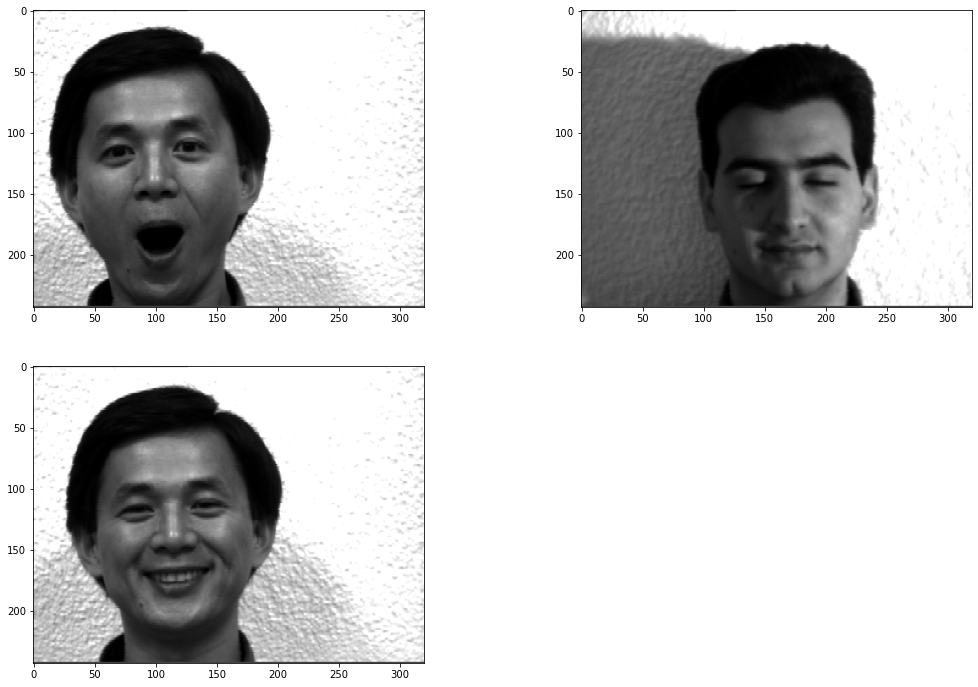

In [34]:
# Plotting images with same hash code
igs = [images[i] for i in range (len(images)) if i in values[2]]
fig = plt.figure()
cols = 2
n_images =len(igs)
for n,image in zip(range(n_images),igs):
    ax = fig.add_subplot(cols,np.ceil(n_images/float(cols)),n+1)
    plt.gray()
    plt.imshow(image)
fig.set_size_inches(np.array(fig.get_size_inches())*n_images)
plt.show()